In [40]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import fsolve

---
---

# Question 1. Suppose three firms have PD’s and PDJ’s as follows:
$PD_1$ | $PD_2$ | $PD_3$ | $PDJ_{1,2}$ | $PDJ_{1,3}$ | $PDJ_{2,3}$
:-:|:-:|:-: |:-:|:-:|:-:
$0.1$|$0.2$|$0.3$|$0.06$|$0.06$|$0.06$
#### Find the three values of correlation, $\rho_{1,2}$, $\rho_{1,3}$, and $\rho_{2,3}$ and find the three values of default correlation, $Corr[D_1, D_2]$, $Corr[D_1, D_3]$, and $Corr[D_2, D_3]$

In [41]:
PD1 = 0.1
PD2 = 0.2
PD3 = 0.3
PDJ12 = 0.06
PDJ13 = 0.06
PDJ23 = 0.06

dcorr12 = (PDJ12 - PD1 * PD2) / np.sqrt(PD1 * (1 - PD1) * PD2 * (1 - PD2))
dcorr13 = (PDJ13 - PD1 * PD3) / np.sqrt(PD1 * (1 - PD1) * PD3 * (1 - PD3))
dcorr23 = (PDJ23 - PD2 * PD3) / np.sqrt(PD2 * (1 - PD2) * PD3 * (1 - PD3))

print("Dcorr[1,2] =", round(dcorr12,2))
print("Dcorr[1,3] =", round(dcorr13,2))
print("Dcorr[2,3] =", round(dcorr23,2))

Dcorr[1,2] = 0.33
Dcorr[1,3] = 0.22
Dcorr[2,3] = 0.0


In [42]:
from scipy.stats import multivariate_normal

In [43]:
def f(rho, PD1=0.1, PD2=0.2, PDJ12=0.06):
    return multivariate_normal(mean=[0,0], cov=[[1,rho],[rho,1]]).cdf([stats.norm.ppf(PD1),stats.norm.ppf(PD2)]) - PDJ12

rho12 = fsolve(f, 0.5)

#rho13 with PD1=0.1, PD3=0.3, PDJ13=0.06
def f(rho, PD1=0.1, PD3=0.3, PDJ13=0.06):
    return multivariate_normal(mean=[0,0], cov=[[1,rho],[rho,1]]).cdf([stats.norm.ppf(PD1),stats.norm.ppf(PD3)]) - PDJ13

rho13 = fsolve(f, 0.5)

#rho23 with PD2=0.2, PD3=0.3, PDJ23=0.06
def f(rho, PD2=0.2, PD3=0.3, PDJ23=0.06):
    return multivariate_normal(mean=[0,0], cov=[[1,rho],[rho,1]]).cdf([stats.norm.ppf(PD2),stats.norm.ppf(PD3)]) - PDJ23

rho23 = fsolve(f, 0.5)

print("Rho[1,2] =", round(rho12[0],2))
print("Rho[1,3] =", round(rho13[0],2))
print("Rho[2,3] =", round(rho23[0],2))

Rho[1,2] = 0.6
Rho[1,3] = 0.43
Rho[2,3] = 0.0


---
---

# Question 2 Suppose that each of three firms have $PD = 0.10$ and that the correlations are
1 | 0.4 | 0.5
:-:|:-:|:-:
0.4|1|0.6
0.5|0.6|1
#### State the three values of PDJ. State the range of possible values for the probability that all three of the firms default. State the probability that all three default under the Gauss copula.

In [44]:
corr12 = 0.4
corr13 = 0.5
corr23 = 0.6

PD1 = 0.1
PD2 = 0.1
PD3 = 0.1

PDJ12 = multivariate_normal(mean=[0,0], cov=[[1,corr12],[corr12,1]]).cdf([stats.norm.ppf(PD1),stats.norm.ppf(PD2)])
PDJ13 = multivariate_normal(mean=[0,0], cov=[[1,corr13],[corr13,1]]).cdf([stats.norm.ppf(PD1),stats.norm.ppf(PD3)])
PDJ23 = multivariate_normal(mean=[0,0], cov=[[1,corr23],[corr23,1]]).cdf([stats.norm.ppf(PD2),stats.norm.ppf(PD3)])

print("PDJ12 =", round(PDJ12,3))
print("PDJ13 =", round(PDJ13,3))
print("PDJ23 =", round(PDJ23,3))

PDJ12 = 0.027
PDJ13 = 0.032
PDJ23 = 0.039


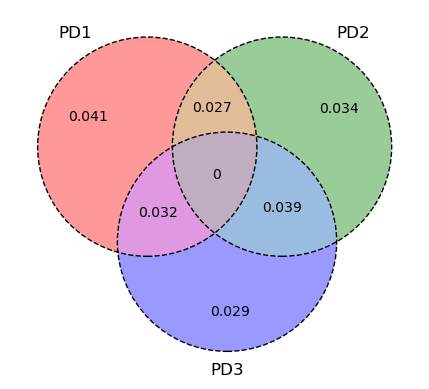

In [45]:
# Create a venn diagram
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

PDJ123 = 0

v = venn3(subsets = (round(0.1-round(PDJ12,3)-round(PDJ13,3),3), round(0.1-round(PDJ12,3)-round(PDJ23,3),3), round(PDJ12,3), round(0.1-round(PDJ13,3)-round(PDJ23,3),3), round(PDJ13,3), round(PDJ23,3), PDJ123), set_labels = ('PD1', 'PD2', 'PD3'))
c = venn3_circles(subsets = (round(0.1-round(PDJ12,3)-round(PDJ13,3),3), round(0.1-round(PDJ12,3)-round(PDJ23,3),3), round(PDJ12,3), round(0.1-round(PDJ13,3)-round(PDJ23,3),3), round(PDJ13,3), round(PDJ23,3), PDJ123), linestyle='dashed')
c[0].set_lw(1.0)
c[1].set_lw(1.0)
c[2].set_lw(1.0)
plt.show()

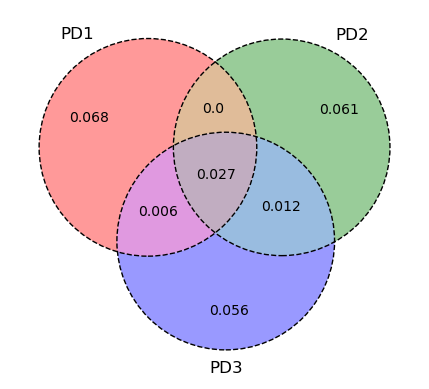

In [46]:
# Subset sizes PD1, PD2, PD3 = 0.1, 0.1, 0.1 respectively, PDJ12, PDJ13, PDJ23 = 0.03, 0.03, 0.04 respectively
PDJ123 = min(PDJ12, PDJ13, PDJ23)

v = venn3(subsets = (round(0.1-round(PDJ12,3)-round(PDJ13,3)+round(PDJ123,3),3), round(0.1-round(PDJ12,3)-round(PDJ23,3)+round(PDJ123,3),3), round(PDJ12-PDJ123,3), round(0.1-round(PDJ13,3)-round(PDJ23,3)+round(PDJ123,3),3), round(PDJ13-PDJ123,3), round(PDJ23-PDJ123,3), round(PDJ123,3)), set_labels = ('PD1', 'PD2', 'PD3'))
c = venn3_circles(subsets = (round(0.1-round(PDJ12,3)-round(PDJ13,3)+round(PDJ123,3),3), round(0.1-round(PDJ12,3)-round(PDJ23,3)+round(PDJ123,3),3), round(PDJ12-PDJ123,3), round(0.1-round(PDJ13,3)-round(PDJ23,3)+round(PDJ123,3),3), round(PDJ13-PDJ123,3), round(PDJ23-PDJ123,3), round(PDJ123,3)), linestyle='dashed')
c[0].set_lw(1.0)
c[1].set_lw(1.0)
c[2].set_lw(1.0)
plt.show()

In [47]:
print(f'The range of PDJ123 is from {0.00} to {round(min(PDJ12, PDJ13, PDJ23),3)}')

The range of PDJ123 is from 0.0 to 0.027


In [48]:
#Find PDJ123 under Gaussian copula

PDJ123 = multivariate_normal(mean=[0,0,0], cov=[[1,corr12,corr13],[corr12,1,corr23],[corr13,corr23,1]]).cdf([stats.norm.ppf(PD1),stats.norm.ppf(PD2),stats.norm.ppf(PD3)])

print("PDJ123 =", round(PDJ123,3))

PDJ123 = 0.016


---
---

# Question 3. Suppose a firm rated A has correlation 0.4 with a firm rated B. In the following period, Firm A remains rated A with prob = 0.5, and so forth:
#### Transition Probabilities
|Initial Rating|Final Rating = A|Final Rating = B|Final Rating = D|
:-|:--:|-:|-:
A|0.5|0.4|0.1
B|0.3|0.5|0.2

#### In your answer file, create a three-by-three grid. Fill in the cells with probabilities of final rating that sum to 1.00. Two digits of accuracy is sufficient, e.g., 0.66. Assume that transitions obey a Gauss copula.

In [49]:
Pdd = multivariate_normal(mean=[0,0], cov=[[1,0.4],[0.4,1]]).cdf([stats.norm.ppf(0.1),stats.norm.ppf(0.2)])
Pbd = multivariate_normal(mean=[0,0], cov=[[1,0.4],[0.4,1]]).cdf([stats.norm.ppf(0.5),stats.norm.ppf(0.2)]) - Pdd
Pdb = multivariate_normal(mean=[0,0], cov=[[1,0.4],[0.4,1]]).cdf([stats.norm.ppf(0.1),stats.norm.ppf(0.7)]) - Pdd
Pbb = multivariate_normal(mean=[0,0], cov=[[1,0.4],[0.4,1]]).cdf([stats.norm.ppf(0.5),stats.norm.ppf(0.7)]) - Pdd - Pbd - Pdb

Pad = multivariate_normal(mean=[0,0], cov=[[1,0.4],[0.4,1]]).cdf([stats.norm.ppf(1),stats.norm.ppf(0.2)]) - Pdd - Pbd
Pda = multivariate_normal(mean=[0,0], cov=[[1,0.4],[0.4,1]]).cdf([stats.norm.ppf(0.1),stats.norm.ppf(1)]) - Pdd - Pdb

Pab = multivariate_normal(mean=[0,0], cov=[[1,0.4],[0.4,1]]).cdf([stats.norm.ppf(1),stats.norm.ppf(0.7)]) - Pdd - Pbd - Pad - Pdb - Pbb
Pba = multivariate_normal(mean=[0,0], cov=[[1,0.4],[0.4,1]]).cdf([stats.norm.ppf(0.5),stats.norm.ppf(1)]) - Pdd - Pbd - Pda - Pdb - Pbb

Paa = 1 - Pdd - Pbd - Pdb - Pad - Pda - Pab - Pba - Pbb

In [50]:
print("Pdd =", round(Pdd,3))
print("Pbd =", round(Pbd,3))
print("Pdb =", round(Pdb,3))
print("Pbb =", round(Pbb,3))
print("Pad =", round(Pad,3))
print("Pda =", round(Pda,3))
print("Pab =", round(Pab,3))
print("Pba =", round(Pba,3))
print("Paa =", round(Paa,3))

Pdd = 0.044
Pbd = 0.101
Pdb = 0.047
Pbb = 0.215
Pad = 0.055
Pda = 0.009
Pab = 0.238
Pba = 0.084
Paa = 0.207


In [51]:
from prettytable import PrettyTable
#create a pretty table of the with Rows as A, B, D and Columns as A, B, D
x = PrettyTable()
x.field_names = ["","D", "B", "A"]
x.add_row(["A", round(Pda,3), round(Pba,3), round(Paa,3)])
x.add_row(["B", round(Pdb,3), round(Pbb,3), round(Pab,3)])
x.add_row(["D", round(Pdd,3), round(Pbd,3), round(Pad,3)])
print(x)

+---+-------+-------+-------+
|   |   D   |   B   |   A   |
+---+-------+-------+-------+
| A | 0.009 | 0.084 | 0.207 |
| B | 0.047 | 0.215 | 0.238 |
| D | 0.044 | 0.101 | 0.055 |
+---+-------+-------+-------+


---
---

# Question 4. Suppose that four firms have PDs equal to 1%, 2%, 3%, and 4% and the probability that any given pair defaults equals 0.1%. What is the matrix of correlations? Explain whether the connection between the defaults of the four firms is consistent or not consistent with a Gauss copula.

In [52]:
pd1 = 0.01
pd2 = 0.02
pd3 = 0.03
pd4 = 0.04
pdij = 0.001

def solve_rho(pdi, pdj, pdij):
    inv_pdi = stats.norm.ppf(pdi)
    inv_pdj = stats.norm.ppf(pdj)
    
    def f(rho):
        return multivariate_normal(mean=[0,0], cov=[[1,rho],[rho,1]]).cdf([inv_pdi,inv_pdj]) - pdij
    
    return fsolve(f, 0.5)

In [53]:
rho12 = solve_rho(pd1, pd2, pdij)
rho13 = solve_rho(pd1, pd3, pdij)
rho14 = solve_rho(pd1, pd4, pdij)
rho23 = solve_rho(pd2, pd3, pdij)
rho24 = solve_rho(pd2, pd4, pdij)
rho34 = solve_rho(pd3, pd4, pdij)

In [54]:
#Make a pretty table of the rhos
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["","1", "2", "3", "4"]
table.add_row(["1", 1, round(rho12[0],3), round(rho13[0],3), round(rho14[0],3)])
table.add_row(["2", round(rho12[0],3), 1, round(rho23[0],3), round(rho24[0],3)])
table.add_row(["3", round(rho13[0],3), round(rho23[0],3), 1, round(rho34[0],3)])
table.add_row(["4", round(rho14[0],3), round(rho24[0],3), round(rho34[0],3), 1])
print("The correlation matrix is:\n")
print(table)

The correlation matrix is:

+---+-------+-------+--------+--------+
|   |   1   |   2   |   3    |   4    |
+---+-------+-------+--------+--------+
| 1 |   1   | 0.311 | 0.237  | 0.183  |
| 2 | 0.311 |   1   | 0.101  | 0.044  |
| 3 | 0.237 | 0.101 |   1    | -0.036 |
| 4 | 0.183 | 0.044 | -0.036 |   1    |
+---+-------+-------+--------+--------+


In [55]:
#Create a matrix of the rhos
rho = np.array([[1, rho12[0], rho13[0], rho14[0]], [rho12[0], 1, rho23[0], rho24[0]], [rho13[0], rho23[0], 1, rho34[0]], [rho14[0], rho24[0], rho34[0], 1]])
#Check if the matrix is positive definite and symmetric
print("Is rho positive definite?", np.all(np.linalg.eigvals(rho) > 0))
print("Is rho symmetric?", np.all(rho == rho.T))
print("The eigenvalues of rho are:", np.linalg.eigvals(rho))

Is rho positive definite? True
Is rho symmetric? True
The eigenvalues of rho are: [1.48024501 0.60944612 1.03579131 0.87451755]
